In [60]:
import numpy as np
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [61]:
X = np.array([
    [1, 5],
    [2, 6],
    [3, 7],
    [4, 8],
    [5, 9],
    [2, 7],
    [3, 8],
    [5, 1],
    [6, 2],
    [7, 3],
    [8, 4],
    [9, 5],
    [7, 2],
    [8, 3]
])

y = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1])

In [62]:
X[0, :]

array([1, 5])

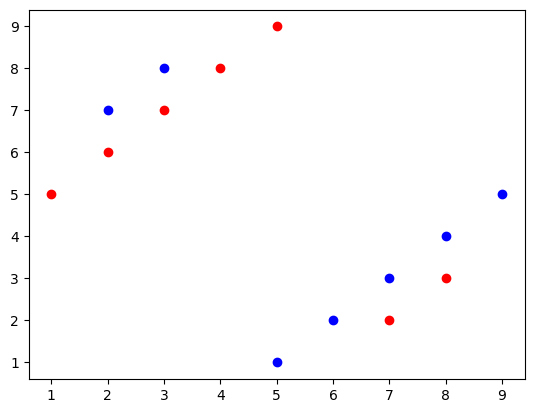

In [63]:
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue')
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='red')
plt.show()

In [64]:
param_grid = {
    'n_neighbors': range(1, y.shape[0])
}
knn = KNeighborsClassifier()
search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=LeaveOneOut())
search.fit(X, y)

GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 14)})

In [65]:
search.best_params_

{'n_neighbors': 5}

In [66]:
print(f'error: {1 - accuracy_score(y, search.best_estimator_.predict(X))}')

error: 0.2857142857142857


In [76]:
one_nn = KNeighborsClassifier(n_neighbors=1)
one_nn.fit(X, y)
xx, yy = np.meshgrid(np.arange(0, 10, 0.01), np.arange(0, 10, 0.01))
y_pred = one_nn.predict(np.c_[xx.ravel(), yy.ravel()])

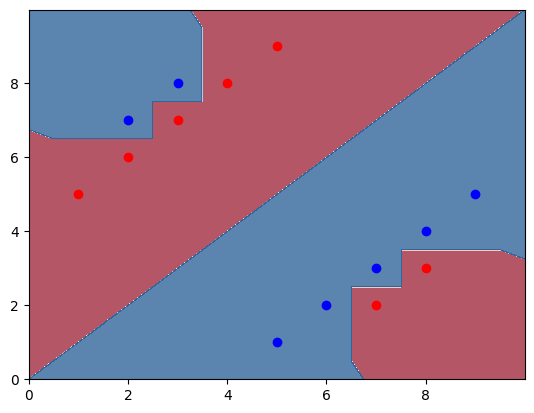

In [80]:
plt.contourf(xx, yy, y_pred.reshape(xx.shape), alpha=0.7, cmap='RdBu')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue')
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='red')
plt.show()

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set(style="whitegrid")

In [3]:
import pandas as pd

# Load the dataset
# "Attrition" is our target columm

df = pd.read_csv('./Practical1/dataset.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
2,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
3,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8
4,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,1606,...,3,80,1,32,3,3,30,8,12,13


In [4]:
le = LabelEncoder()
categorical_df = df.drop(labels=list(df._get_numeric_data().columns), axis=1)
df[categorical_df.columns] = df[categorical_df.columns].apply(le.fit_transform)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,0,2,592,1,7,3,1,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,34,0,2,1326,2,3,3,4,1,1478,...,4,80,0,15,2,3,13,9,3,12
2,27,0,2,954,2,9,3,2,1,1965,...,1,80,0,7,5,3,7,7,0,7
3,32,0,2,929,2,10,3,2,1,722,...,4,80,0,10,2,2,10,7,0,8
4,50,0,1,1234,1,20,5,3,1,1606,...,3,80,1,32,3,3,30,8,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,35,0,2,750,1,28,3,1,1,1596,...,4,80,2,10,3,2,10,9,6,8
898,41,0,2,447,1,5,3,1,1,1814,...,1,80,0,11,3,1,3,2,1,2
899,22,1,1,1256,1,3,4,1,1,1203,...,2,80,1,1,5,3,0,0,0,0
900,29,0,2,1378,1,13,2,4,1,2053,...,1,80,1,10,2,3,4,3,0,3


In [7]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

categorical_df

# TODO: Perform a train-test split using train_test_split() from sklearn
# Split the dataset into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# TODO: Scale the features using StandardScaler
# Fit the scaler on the training data and transform both the training and test sets
scaler = StandardScaler()
X_trian = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# TODO: Implement AdaBoost model
adaboost = AdaBoostClassifier(random_state=42, algorithm='SAMME')

# TODO: Set up a hyperparameter tuning process for AdaBoost using GridSearchCV
# Suggested parameter grid: {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1.0]}
param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# GridSearchCV with AdaBoost
adaboost_cv = GridSearchCV(adaboost, param_grid_ada, cv=5)

# TODO: Fit the GridSearchCV on the training data to find the best parameters
# Use adaboost_cv.fit() with the training data
adaboost_cv.fit(X_train, y_train)

# TODO: Use the best AdaBoost model for predictions on the test data
# Use adaboost_cv.best_estimator_ and predict()
y_pred_adaboost = adaboost_cv.best_estimator_.predict(X_test)

# TODO: Print the AdaBoost model accuracy and classification report using sklearn's metrics
# Use accuracy_score and classification_report
print(accuracy_score(y_test, y_pred_adaboost))
print(classification_report(y_test, y_pred_adaboost))

0.8265682656826568
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       214
           1       0.63      0.42      0.51        57

    accuracy                           0.83       271
   macro avg       0.74      0.68      0.70       271
weighted avg       0.81      0.83      0.81       271

